In [1]:
import numpy as np
from PIL import Image
import numpy as np
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
import pickle
from collections import Counter

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding="latin1")
    return dict

In [3]:
#fontion qui remplace le fit et predict de KNeighborsClassifier() 
def knn_predict_one(test_data_one, k, img_data, img_label):
    # calcul distance entre deux images
    distances = []
    for index in range(len(img_data)):
        # calcul de la distance euclidienne en convertissant les uint en int pour éviter les erreurs de calcul
        dist = np.sum((img_data[index].astype(int) - test_data_one.astype(int)) ** 2)
        distances.append((img_data[index], np.sqrt(dist), img_label[index])) 
    distances.sort(key=lambda x: x[1]) #on trie dans l'ordre croissant des distances
    neighbors = distances[:k] # on garde les k premiers qui correspondent aux k plus proches voisins
    return neighbors

In [4]:
def show_img(img_arr, label_arr, meta, index):
    one_img = img_arr[index, :]
    # Assume image size is 32 x 32. First 1024 px is r, next 1024 px is g, last 1024 px is b from the (r,g b) channel
    r = one_img[:1024].reshape(32, 32)
    g = one_img[1024:2048].reshape(32, 32)
    b = one_img[2048:].reshape(32, 32)
    rgb = np.dstack([r, g, b])
    img = Image.fromarray(np.array(rgb), 'RGB')
    display(img)

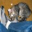

cat :: deer


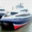

ship :: ship


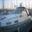

ship :: ship


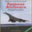

airplane :: ship


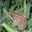

frog :: dog


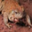

frog :: deer


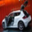

automobile :: cat


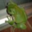

frog :: bird


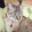

cat :: bird


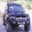

automobile :: ship


In [5]:
basedir_data = "./data/"
rel_path = basedir_data + "cifar-10-batches-py/"
X = unpickle(rel_path + 'data_batch_1')
img_data = X['data']
img_label_orig = img_label = X['labels']
img_label = np.array(img_label).reshape(-1, 1)
test_X = unpickle(rel_path + 'test_batch')
test_data = test_X['data']
test_label = test_X['labels']
test_label = np.array(test_label).reshape(-1, 1)
batch = unpickle(rel_path + 'batches.meta')
meta = batch['label_names']
for index in range(10): #pour les 10 premières images de test
    pred = knn_predict_one(test_data[index], 3, img_data, img_label)
    label_pred_list = [(item[2])[0] for item in pred] #on récupère la liste des labels qui correspondent aux k voisins
    label = Counter(label_pred_list).most_common()[0][0] #on récupère le label qui est présent le plus de fois dans la liste
    show_img(test_data, img_label, meta, index)
    print(meta[test_label[index][0]], "::", meta[label])

#### Pourquoi je n'ai pas exactement les mêmes résultats que le KNeighborsClassifier comme montré dans le sujet de TP :
En cas d'égalité du nombre d'occurences pour les labels *(si par exemple les trois images les plus proches d'une image test correspondent à trois catégories différentes)*, j'ai choisi de prendre la catégorie **qui correspond à l'image qui a la plus petite distance**. De ce fait, au lieu d'avoir *airplane :: airplane (label 0)* et *frog :: bird (label 2)*, j'ai : *airplane :: ship (label 8)* et *frog :: deer (label 4)* alors que dans le knn classifer, il choisit le label dans l'ordre croissant et donc le plus petit (donc ici 0 et 2).
Cela nous fait perdre une prédiction dans notre exemple avec 10 images de test mais dans l'ensemble du tableau, **je pense que cette méthode est un peu plus optimisée.**